<a href="https://colab.research.google.com/github/Xw-Jia/2019_SaveYourself_GetOffer/blob/master/%E4%B9%A6%E7%9B%AE%E6%95%B4%E7%90%86/Python%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0/Part1%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80/%E4%BB%A3%E7%A0%81/3_6_house_price_prredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
预测房价，是回归问题
逻辑回归，不是回归算法，是分类算法
'''
'''
本节想预测房价的中位数，已知犯罪率/房产税等...
每个特征，都有不同的取值范围，有些特征是比率，取值0-1，有些数值，0-100
'''

'\n本节想预测房价的中位数，已知犯罪率/房产税等...\n每个特征，都有不同的取值范围，有些特征是比率，取值0-1，有些数值，0-100\n'

In [3]:
'''
加载数据集
'''
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [4]:
train_data.shape  #数据含有13个特征

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
'''
准备数据，数据预处理
'''

# 数据标准化
# (x-平均值)/(标准差)
# 经过数据标准化之后，均值为0，标准差为1
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [9]:
'''
构建网络
因为样本少，所以，为了避免过拟合，使用很小的网络，
只含有两个隐藏层，每层64个单元
'''
#模型定义
from keras import models
from keras import layers

def build_model():
    # 因为需要将同一个模型多次实例化
    # 所以使用函数来构建模型
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
'''
网络的最后一层没有激活，是一个线性层。这是标量回归的典型设置
标量回归：预测单一连续值的回归
添加激活函数会导致输出的范围被限制，所以只有一个线性层就ok了

另外，mse损失函数：均方差，预测值与真实值差的平方，回归问题经常使用
监控指标：mae: 平均绝对误差，预测值与真实值的差的绝对值
'''

'\n网络的最后一层没有激活，是一个线性层。这是标量回归的典型设置\n标量回归：预测单一连续值的回归\n添加激活函数会导致输出的范围被限制，所以只有一个线性层就ok了\n\n另外，mse损失函数：均方差，预测值与真实值差的平方，回归问题经常使用\n监控指标：mae: 平均绝对误差，预测值与真实值的差的绝对值\n'

利用K折验证来验证模型的方法：

（当样本数量很少，选择不同的验证集val会导致结果出现很大的差异，波动太大===>K折交叉验证，K一般取4或者5）

定义：实例化K个相同的模型，将每个模型在K-1个分区上面训练，在剩下的一个分区上验证，模型的验证分数等于K个验证分数的平均值；


![](https:??i.loli.net/2019/05/01/5cc97b0a1ae26.png)

In [15]:
'''
K折验证的代码
'''
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold  #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]
    ],axis=0)
    
    partial_train_targets = np.concatenate([
        train_targets[: i * num_val_samples],
        train_targets[(i+1) * num_val_samples:]
    ],axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold  # 0
processing fold  # 1
processing fold  # 2
processing fold  # 3


In [16]:
all_scores

[2.1727145402738364, 2.920784041433051, 2.3140918476746815, 2.4518954765678633]

In [17]:
np.mean(all_scores)

2.464871476487358

这样，对val_mae使用了均值操作，平均分数就是一个更可靠的指标


In [18]:
'''
为了记录模型在每一轮的表现，修改训练的循环，保存每一轮的验证分数
'''

from keras import backend as K

# Some memory clean-up
K.clear_session()


num_epochs = 300
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
# 每个epochs中所有折MAE的平均值
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

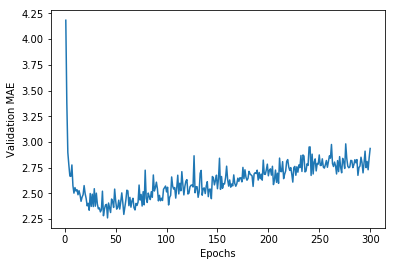

In [20]:
# 画图，查看验证分数

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

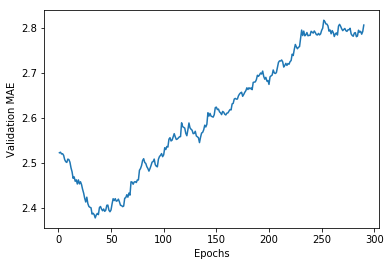

In [21]:
# 明显看到前10个epoch的取值太大，导致看不到后面的情况
# 删除前十个值，再做个平滑
# 平滑采用指数移动平均值替代

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [22]:
# 35轮不再降低
'''
训练最终模型
'''
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=40, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [23]:
test_mae_score

2716.227965111826

本节中学到的知识：


1.   回归常用的损失函数不一样，常用的是MSE（均方误差）
2.   精度的概念不适用回归问题，采用MAE（平均绝对误差）
3.   数据很少的时候，两条经验：
    1. K折验证
    2. 隐藏层较少的小型网络，避免过拟合

